# MAY THE DATA BE WITH YOU: A STAR WARS DATA ANALYSIS 

## Hello There! This is a data analysis based on a 2014 survey that had 1186 responses about people's preference for Star Wars, the films, certain characters, and more.

###### First, we will load the csv file and describe the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("StarWars.csv")
display(df)

df_describe = df.describe()
df_describe

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Have you seen Episode 1?,Have you seen Episode 2?,Have you seen Episode 3?,Have you seen Episode 4?,Have you seen Episode 5?,Have you seen Episode 6?,Film Rank 1,...,Jar Jar Binks,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,3288388730,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1182,3288378779,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1183,3288375286,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1184,3288373068,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


,RespondentID,Film Rank 1,Film Rank 2,Film Rank 3,Film Rank 4,Film Rank 5,Film Rank 6
count,1.186000e+03,835.000000,836.000000,835.000000,836.000000,836.000000,836.000000
mean,3.290128e+09,3.732934,4.087321,4.341317,3.272727,2.513158,3.047847
std,1.055639e+06,1.656122,1.365365,1.400464,1.825901,1.578620,1.666897
min,3.288373e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.289451e+09,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000
50%,3.290147e+09,4.000000,4.000000,5.000000,3.000000,2.000000,3.000000
75%,3.290814e+09,5.000000,5.000000,6.000000,5.000000,3.000000,4.000000
max,3.292880e+09,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


# Data Preprocessing

Now, let's put this data into the trash compactor and compact it a bit for easier processing! First, let's convert Yes and No answers into True and False, respectively.

In [2]:
yes_no = {'Yes': True, 'No': False}

for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?",
    "Are you familiar with the Expanded Universe?",
    "Do you consider yourself to be a fan of the Expanded Universe?",
    "Do you consider yourself to be a fan of the Star Trek franchise?"
    ]:
    df[col] = df[col].map(yes_no)

df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Have you seen Episode 1?,Have you seen Episode 2?,Have you seen Episode 3?,Have you seen Episode 4?,Have you seen Episode 5?,Have you seen Episode 6?,Film Rank 1,...,Jar Jar Binks,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Now, let's take the columns where they were asked if they saw each film and change the name of the film to True and no response to False.

In [3]:
movie_mapping = {
    'Star Wars: Episode I The Phantom Menace': True,
    np.nan: False,
    'Star Wars: Episode II Attack of the Clones': True,
    'Star Wars: Episode III Revenge of the Sith': True,
    'Star Wars: Episode IV A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True
}

for col in df.columns[3:9]:
    df[col] = df[col].map(movie_mapping)
    
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Have you seen Episode 1?,Have you seen Episode 2?,Have you seen Episode 3?,Have you seen Episode 4?,Have you seen Episode 5?,Have you seen Episode 6?,Film Rank 1,...,Jar Jar Binks,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Now, let's remove any responses that did not fill out at least 14 columns. This will remove any respondents who did not fill out more than just the Yes/No questions and the demographic data. 

In [4]:
df = df.dropna(thresh=13)

display(df)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Have you seen Episode 1?,Have you seen Episode 2?,Have you seen Episode 3?,Have you seen Episode 4?,Have you seen Episode 5?,Have you seen Episode 6?,Film Rank 1,...,Jar Jar Binks,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,3288388730,True,True,True,True,True,True,True,True,5.0,...,Very favorably,Han,False,NaN,True,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1182,3288378779,True,True,True,True,True,True,True,True,4.0,...,Very favorably,I don't understand this question,False,NaN,True,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1183,3288375286,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,False,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1184,3288373068,True,True,True,True,True,True,True,True,4.0,...,Very favorably,Han,False,NaN,True,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


Now, in order to crunch the numbers, let's change the True/False values to 1 and 0, respectively.

In [5]:
for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?",
    "Have you seen Episode 1?",
    "Have you seen Episode 2?",
    "Have you seen Episode 3?",
    "Have you seen Episode 4?",
    "Have you seen Episode 5?",
    "Have you seen Episode 6?",
    "Are you familiar with the Expanded Universe?",
    "Do you consider yourself to be a fan of the Expanded Universe?",
    "Do you consider yourself to be a fan of the Star Trek franchise?"
    ]:
    df[col] = df[col].map({True: 1, False: 0})

df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Have you seen Episode 1?,Have you seen Episode 2?,Have you seen Episode 3?,Have you seen Episode 4?,Have you seen Episode 5?,Have you seen Episode 6?,Film Rank 1,...,Jar Jar Binks,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,1,1.0,1,1,1,1,1,1,3.0,...,Very favorably,I don't understand this question,1.0,0.0,0.0,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,0,NaN,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,1.0,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,1,0.0,1,1,1,0,0,0,1.0,...,Unfamiliar (N/A),I don't understand this question,0.0,NaN,0.0,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,1,1.0,1,1,1,1,1,1,5.0,...,Very favorably,I don't understand this question,0.0,NaN,1.0,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,1,1.0,1,1,1,1,1,1,5.0,...,Somewhat favorably,Greedo,1.0,0.0,0.0,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Initial Data Analysis: Another Look at "America’s Favorite ‘Star Wars’ Movies (And Least Favorite Characters)"

This is where the fun begins! Let's see what we can do with our data to recreate some of the analysis from Walt Hickey's article: "America’s Favorite ‘Star Wars’ Movies (And Least Favorite Characters)."

In [6]:
#First, we will remove respondents who have not seen any Star Wars films and store the remainder in a new DataFrame.
df_initial = df[df["Have you seen any of the 6 films in the Star Wars franchise?"] == 1]

display(df_initial)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Have you seen Episode 1?,Have you seen Episode 2?,Have you seen Episode 3?,Have you seen Episode 4?,Have you seen Episode 5?,Have you seen Episode 6?,Film Rank 1,...,Jar Jar Binks,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,1,1.0,1,1,1,1,1,1,3.0,...,Very favorably,I don't understand this question,1.0,0.0,0.0,Male,18-29,NaN,High school degree,South Atlantic
2,3292765271,1,0.0,1,1,1,0,0,0,1.0,...,Unfamiliar (N/A),I don't understand this question,0.0,NaN,0.0,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,1,1.0,1,1,1,1,1,1,5.0,...,Very favorably,I don't understand this question,0.0,NaN,1.0,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,1,1.0,1,1,1,1,1,1,5.0,...,Somewhat favorably,Greedo,1.0,0.0,0.0,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,1,1.0,1,1,1,1,1,1,1.0,...,Very favorably,Han,1.0,0.0,1.0,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,3288389603,1,1.0,1,1,1,1,1,1,3.0,...,Very favorably,Han,0.0,NaN,0.0,Female,45-60,"$0 - $24,999",Some college or Associate degree,Pacific
1181,3288388730,1,1.0,1,1,1,1,1,1,5.0,...,Very favorably,Han,0.0,NaN,1.0,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1182,3288378779,1,1.0,1,1,1,1,1,1,4.0,...,Very favorably,I don't understand this question,0.0,NaN,1.0,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1184,3288373068,1,1.0,1,1,1,1,1,1,4.0,...,Very favorably,Han,0.0,NaN,1.0,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


836 respondents have seen at least one film. I like those odds! Now, let's determine the percentage of people who have seen each film and plot the results.

In [7]:
film_cols = df_initial.columns[3:9]

percentages = df_initial[film_cols].sum() / df_initial[film_cols].count() * 100

print(percentages)

Have you seen Episode 1?    80.502392
Have you seen Episode 2?    68.301435
Have you seen Episode 3?    65.789474
Have you seen Episode 4?    72.607656
Have you seen Episode 5?    90.669856
Have you seen Episode 6?    88.277512
dtype: float64


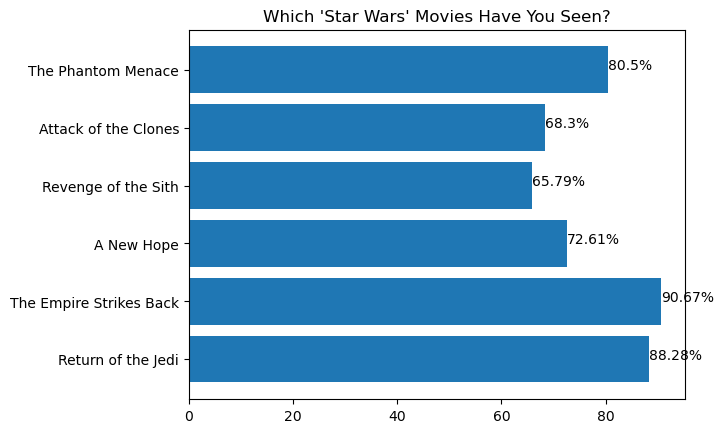

In [8]:
plt.barh(percentages.index, percentages)
for i, v in enumerate(percentages):
    plt.text(v, i, str(round(v, 2)) + '%')
plt.title("Which 'Star Wars' Movies Have You Seen?")
plt.yticks(range(len(percentages.index)), ['The Phantom Menace', 'Attack of the Clones', 'Revenge of the Sith',
                                           'A New Hope', 'The Empire Strikes Back', 'Return of the Jedi'])
plt.gca().invert_yaxis()
plt.show()

Now, let's see who is truly strong in the Force and has seen all 6 films! 

In [9]:
df_initial2 = df_initial[(df_initial['Have you seen Episode 1?'] == 1) & (df_initial['Have you seen Episode 2?'] == 1) 
                        & (df_initial['Have you seen Episode 3?'] == 1) & (df_initial['Have you seen Episode 4?'] == 1) 
                        & (df_initial['Have you seen Episode 5?'] == 1) & (df_initial['Have you seen Episode 6?'] == 1)]

display(df_initial2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Have you seen Episode 1?,Have you seen Episode 2?,Have you seen Episode 3?,Have you seen Episode 4?,Have you seen Episode 5?,Have you seen Episode 6?,Film Rank 1,...,Jar Jar Binks,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,1,1.0,1,1,1,1,1,1,3.0,...,Very favorably,I don't understand this question,1.0,0.0,0.0,Male,18-29,NaN,High school degree,South Atlantic
3,3292763116,1,1.0,1,1,1,1,1,1,5.0,...,Very favorably,I don't understand this question,0.0,NaN,1.0,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,1,1.0,1,1,1,1,1,1,5.0,...,Somewhat favorably,Greedo,1.0,0.0,0.0,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,1,1.0,1,1,1,1,1,1,1.0,...,Very favorably,Han,1.0,0.0,1.0,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,1,1.0,1,1,1,1,1,1,6.0,...,Very favorably,Han,1.0,0.0,0.0,Male,18-29,NaN,High school degree,East North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,3288401136,1,1.0,1,1,1,1,1,1,1.0,...,Somewhat favorably,Han,1.0,0.0,1.0,Female,45-60,"$50,000 - $99,999",Graduate degree,West South Central
1180,3288389603,1,1.0,1,1,1,1,1,1,3.0,...,Very favorably,Han,0.0,NaN,0.0,Female,45-60,"$0 - $24,999",Some college or Associate degree,Pacific
1181,3288388730,1,1.0,1,1,1,1,1,1,5.0,...,Very favorably,Han,0.0,NaN,1.0,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1182,3288378779,1,1.0,1,1,1,1,1,1,4.0,...,Very favorably,I don't understand this question,0.0,NaN,1.0,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain


471 respondents were strong in the Force! Now, let's see how they would rank each film! 

In [10]:
rank_counts = df_initial2.iloc[:, 9:15].apply(pd.Series.value_counts)
rank_counts = rank_counts.transpose()
rank_counts.columns = ['The Phantom Menace', 'Attack of the Clones', 'Revenge of the Sith',
                                           'A New Hope', 'The Empire Strikes Back', 'Return of the Jedi']
print(rank_counts)

             The Phantom Menace  Attack of the Clones  Revenge of the Sith  \
Film Rank 1                  47                    30                   47   
Film Rank 2                  18                    47                   52   
Film Rank 3                  27                    34                   68   
Film Rank 4                 128                   107                   86   
Film Rank 5                 169                   133                   71   
Film Rank 6                  82                   120                  147   

             A New Hope  The Empire Strikes Back  Return of the Jedi  
Film Rank 1         129                       76                 142  
Film Rank 2          84                      186                  84  
Film Rank 3         121                      104                 116  
Film Rank 4          60                       30                  60  
Film Rank 5          33                       49                  16  
Film Rank 6          44    

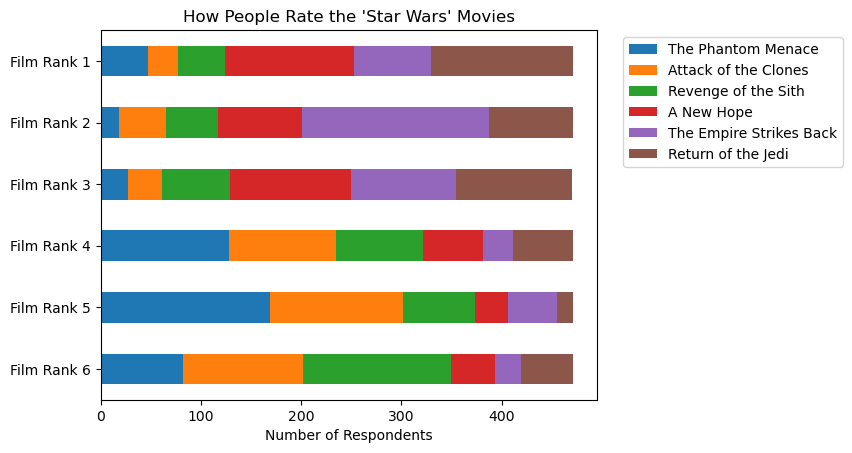

In [11]:
rank_counts.plot(kind='barh', stacked=True)

plt.title("How People Rate the 'Star Wars' Movies")
plt.xlabel("Number of Respondents")

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.gca().invert_yaxis()
plt.show()

While this bar plot may not match the article's plot, I think this displays the data a little better! We can see how the original trilogy dominates the top 3 rankings while the prequel trilogy falls in the bottom 3 rankings. Now let's see how the characters from the films rank!

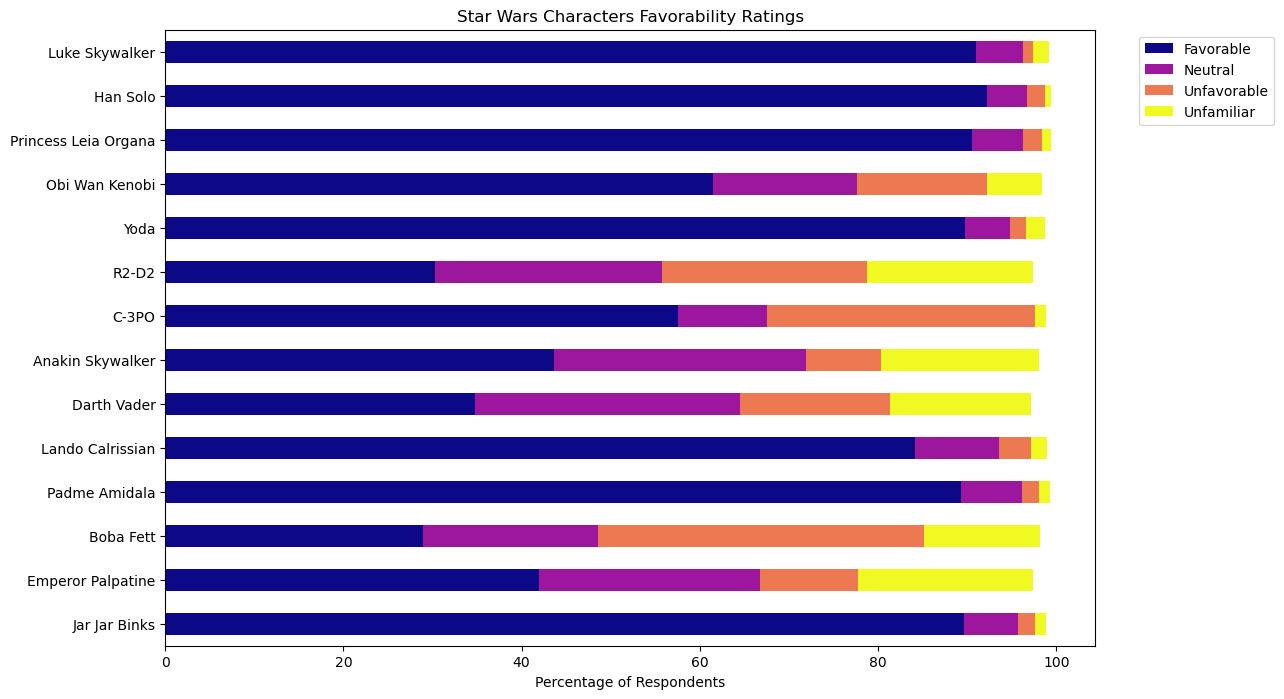

In [12]:
char_cols = ['Luke Skywalker', 'Han Solo', 'Princess Leia Organa', 'Obi Wan Kenobi', 'Yoda', 'R2-D2', 'C-3PO', 'Anakin Skywalker', 
             'Darth Vader', 'Lando Calrissian', 'Padme Amidala', 'Boba Fett', 'Emperor Palpatine', 'Jar Jar Binks']
char_ratings = df_initial[char_cols]
total_respondents = len(char_ratings)

char_ratings_pct = (char_ratings.apply(pd.Series.value_counts) / total_respondents) * 100
char_ratings_pct = char_ratings_pct.transpose()

favorable = ['Very favorably', 'Somewhat favorably']
neutral = ['Neither favorably nor unfavorably (neutral)']
unfavorable = ['Somewhat unfavorably', 'Very unfavorably']
unfamiliar = ['Unfamiliar (N/A)']

char_ratings_pct['Favorable'] = char_ratings_pct[favorable].sum(axis=1)
char_ratings_pct['Neutral'] = char_ratings_pct[neutral].sum(axis=1)
char_ratings_pct['Unfavorable'] = char_ratings_pct[unfavorable].sum(axis=1)
char_ratings_pct['Unfamiliar'] = char_ratings_pct[unfamiliar].sum(axis=1)
char_ratings_pct = char_ratings_pct[['Favorable', 'Neutral', 'Unfavorable', 'Unfamiliar']]

cmap = plt.get_cmap('RdYlGn', 4)
ax = char_ratings_pct.plot(kind='barh', stacked=True, figsize=(12,8), cmap = 'plasma')
ax.set_xlabel('Percentage of Respondents')
ax.set_title('Star Wars Characters Favorability Ratings')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.gca().invert_yaxis()
plt.show()

Never tell me the odds! In using a different approach, it would seem that we have different results from the article. The most surprising is...Jar Jar Binks is actually quite favorable! Perhaps the original author had a bias and tampered with the data?

Lastly, let's take a look at a very important question...who shot first?

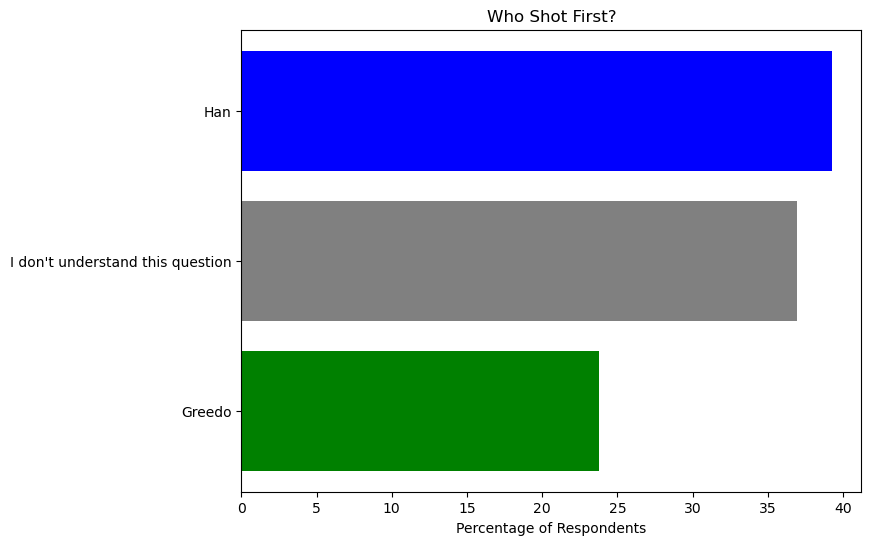

In [13]:
# Select the column for the "Who Shot First?" question
who_shot_first = df_initial['Which character shot first?']

# Get the value counts as a percentage of the total number of respondents
shot_first_count = who_shot_first.value_counts(normalize=True) * 100

color_map = {'Han': 'blue', 'Greedo': 'green', "I don't understand this question": 'gray'}

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(shot_first_count.index, shot_first_count.values, color=[color_map[val] for val in shot_first_count.index])

ax.set_xlabel('Percentage of Respondents')
ax.set_title('Who Shot First?')

plt.gca().invert_yaxis()
plt.show()

# Incomplete, Your Data Analysis Is

Now that we have recreated the initial analysis, it is time to hit the hyperdrive into our own analysis! Let's look at some of the data that the previous analysis did not include in their work.

In [14]:
sw_fans = df[df['Do you consider yourself to be a fan of the Star Wars film franchise?'] == 1]

eu_fam = sw_fans['Are you familiar with the Expanded Universe?'].value_counts(normalize=True) * 100

print(eu_fam)

0.0    66.055046
1.0    33.944954
Name: Are you familiar with the Expanded Universe?, dtype: float64


So, it would seem that only 34% of those who consider themselves Star Wars fans are familiar with the EU! But out of those, who are fans of the EU?

In [15]:
eu_fans = df[(df['Do you consider yourself to be a fan of the Star Wars film franchise?'] == 1) &
            (df['Are you familiar with the Expanded Universe?'] == 1)]

eu_fans_count = eu_fans['Do you consider yourself to be a fan of the Expanded Universe?'].value_counts(normalize=True) * 100

print(eu_fans_count)

1.0    50.27027
0.0    49.72973
Name: Do you consider yourself to be a fan of the Expanded Universe?, dtype: float64


Most impressive! It would seem that we have a 50/49 split in favor of the EU! Now, let's take a look at the data we have on respondents who consider themselves Star Trek fans.

In [16]:
star_trek_fans = sw_fans['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts(normalize=True) * 100

print(star_trek_fans)

1.0    67.889908
0.0    32.110092
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: float64


A surprise, I'm sure, but a welcome one! We have a 68% overlap between Star Wars and Star Trek fans!